# MAB
  for solve explore-exploit problem

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
%matplotlib inline

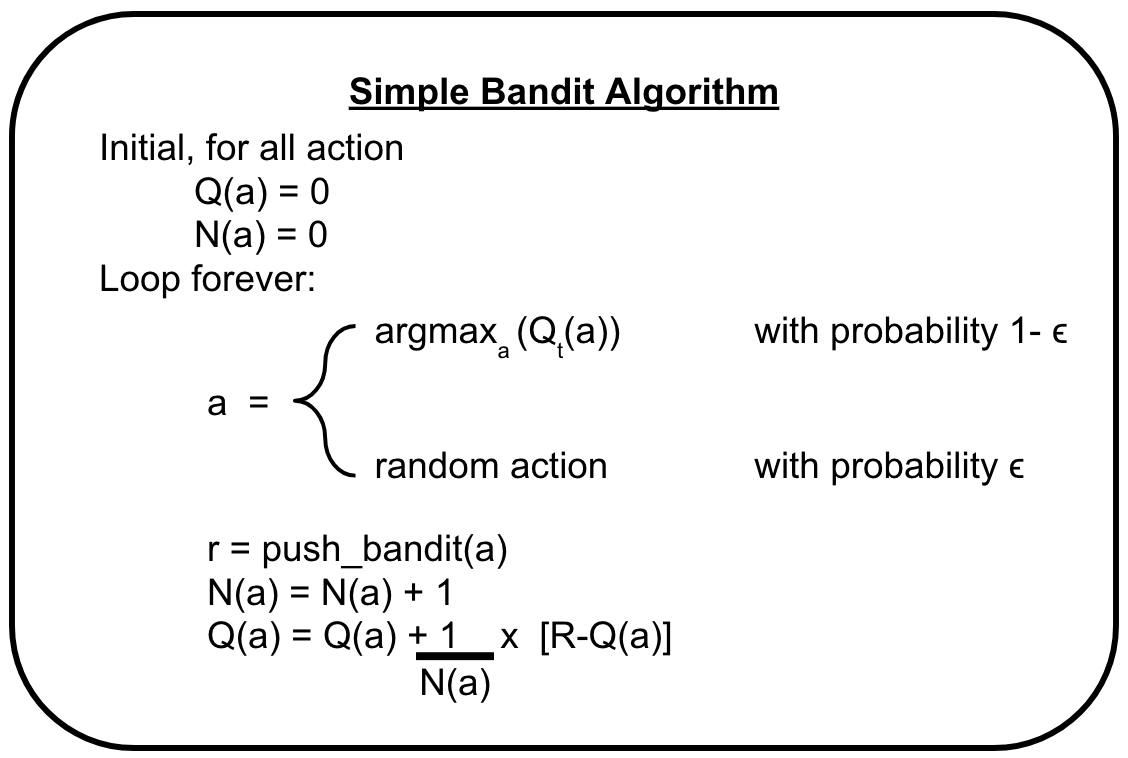

In [2]:
Image("code.png")

In [3]:
#%win unit 10
class MA_Bandit:
    def __init__(self, win):
        self.win = win
        self.estimate_mean = 0
        self.N = 0
    
    def pull(self):
        return random.choices([1,-1], weights=[self.win,100-self.win])[0]
        
    # Update sample mean algorithm
    def update(self, x): 
        self.N += 1
        self.estimate_mean = (1-1.0/self.N)*self.estimate_mean + x/self.N 

# Epsilon Greedy

In [14]:
def epsilon_greedy(w1,w2,w3,n,sigma=0.1):
    s1 = MA_Bandit(w1)
    s2 = MA_Bandit(w2)
    s3 = MA_Bandit(w3)
    bandits = [s1, s2, s3]
    data = np.empty(n)
    
    for i in range(n):
        p = random.choices([1,2], weights=[1-sigma,sigma])[0]
        if p == 1:
            j = np.argmax([b.estimate_mean for b in bandits])
        else:
            j = np.random.choice(3)
            
        x = bandits[j].pull()
        bandits[j].update(x)  
        data[i] = x
        
    cumulative_average = np.cumsum(data) / (np.arange(1000)+1)
    
    return cumulative_average

In [20]:
# w 10 unit 
# n เยอะๆจากกฏ law of large of number
epsilon1 = epsilon_greedy(30,40,70,1000,0.1)
epsilon2 = epsilon_greedy(30,40,70,1000,0.3)
epsilon3 = epsilon_greedy(30,40,70,1000,0.05)
epsilon4 = epsilon_greedy(30,40,70,1000,0.01)

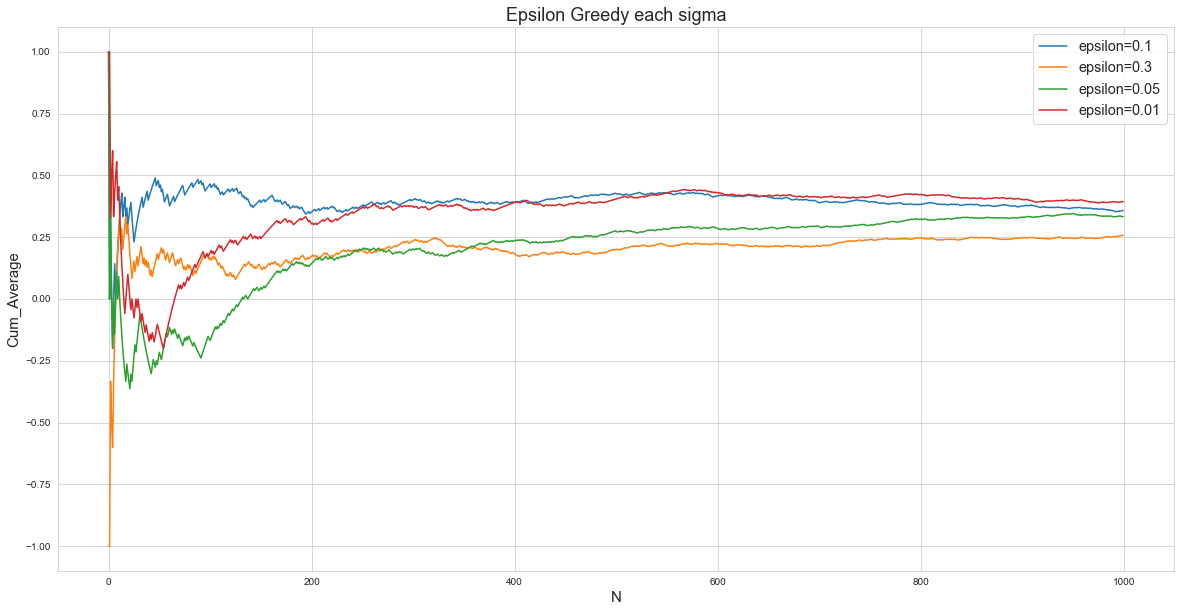

In [21]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')

plt.plot(epsilon1,label='epsilon=0.1')
plt.plot(epsilon2,label='epsilon=0.3')
plt.plot(epsilon3,label='epsilon=0.05')
plt.plot(epsilon4,label='epsilon=0.01')

plt.xlabel('N', fontsize=15)
plt.ylabel('Cum_Average', fontsize=15)
plt.title('Epsilon Greedy each sigma',fontsize=18)
plt.legend(fontsize='x-large')

# เอาไว้หาค่าแต่ละ slot ที่ต้องการ เช่น E(x), n

In [71]:
'''reward = 0
sigma=0.1

s1 = MA_Bandit(50)
s2 = MA_Bandit(60)
s3 = MA_Bandit(30)

bandits = [s1, s2, s3]
data = np.empty(1000)

for i in range(1000):
    p = random.choices([1,2], weights=[1-sigma,sigma])[0]
    if p == 1:
        j = np.argmax([b.estimate_mean for b in bandits])
    else:
        j = np.random.choice(3)
        
    x = bandits[j].pull()
    bandits[j].update(x)  
    data[i] = x
    reward += x'''

'reward = 0\nsigma=0.1\n\ns1 = MA_Bandit(50)\ns2 = MA_Bandit(60)\ns3 = MA_Bandit(30)\n\nbandits = [s1, s2, s3]\ndata = np.empty(1000)\n\nfor i in range(1000):\n    p = random.choices([1,2], weights=[1-sigma,sigma])[0]\n    if p == 1:\n        j = np.argmax([b.estimate_mean for b in bandits])\n    else:\n        j = np.random.choice(3)\n        \n    x = bandits[j].pull()\n    bandits[j].update(x)  \n    data[i] = x\n    reward += x'

In [72]:
'''print('slot machine 1 ; E(x) = {:5.2f}'.format(s1.estimate_mean*100))
print('slot machine 1 ; n = {:5}'.format(s1.N))
print('-'*30)
print('slot machine 2 ; E(x) = {:5.2f}'.format(s2.estimate_mean*100))
print('slot machine 2 ; n = {:5}'.format(s2.N))
print('-'*30)
print('slot machine 3 ; E(x) = {:5.2f}'.format(s3.estimate_mean*100))
print('slot machine 3 ; n = {:5}'.format(s3.N))
print('-'*30)
print(f'reward = {reward}')'''

"print('slot machine 1 ; E(x) = {:5.2f}'.format(s1.estimate_mean*100))\nprint('slot machine 1 ; n = {:5}'.format(s1.N))\nprint('-'*30)\nprint('slot machine 2 ; E(x) = {:5.2f}'.format(s2.estimate_mean*100))\nprint('slot machine 2 ; n = {:5}'.format(s2.N))\nprint('-'*30)\nprint('slot machine 3 ; E(x) = {:5.2f}'.format(s3.estimate_mean*100))\nprint('slot machine 3 ; n = {:5}'.format(s3.N))\nprint('-'*30)\nprint(f'reward = {reward}')"

# Optimize Multi-Armed Bandit - UCB1

In [11]:
#for ucb algorithm    
def equation_ucb(mean, n, nj):
    if nj == 0:
        return float('inf')
    return mean + np.sqrt(2*np.log(n) / nj)

In [22]:
def ucb(w1,w2,w3,n):
    bandits = [MA_Bandit(w1), MA_Bandit(w2), MA_Bandit(w3)]
    data = np.empty(n)
    
    for i in range(n):
        j = np.argmax([equation_ucb(b.estimate_mean,n+1,b.N) for b in bandits])   
        x = bandits[j].pull()
        bandits[j].update(x)  
        data[i] = x
        
    cumulative_average = np.cumsum(data) / (np.arange(n)+1)
    
    return cumulative_average
ucb1 = ucb(20,30,70,1000)

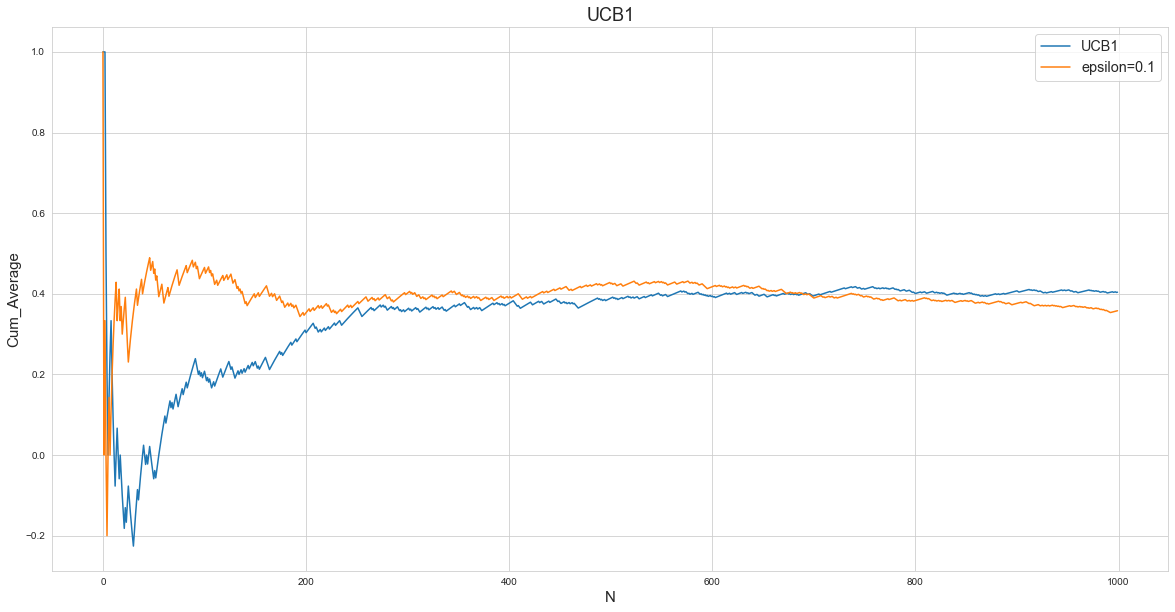

In [23]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
plt.plot(ucb1,label='UCB1')
plt.plot(epsilon1,label='epsilon=0.1')
plt.xlabel('N', fontsize=15)
plt.ylabel('Cum_Average', fontsize=15)
plt.title('UCB1',fontsize=18)
plt.legend(fontsize='x-large')